In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,recall_score,plot_confusion_matrix,precision_score, f1_score
from sklearn import metrics
import seaborn as sns
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
df = pd.read_csv("../data/wpbc.data")

In [3]:
cols=[ 'radius' ,'texture','perimeter','area','smoothness' ,'compactness' ,'concavity','concave_points' , 'symmetry' ,'fractal_dimension']

cols=3*cols
col_names = [i+"_mean" for i in cols[:10]]
col_names=col_names+[i+"_std" for i in cols[10:20]] 
col_names=col_names+[i+"_mean_lg" for i in cols[20:30]] 

In [4]:
col_names=["patient_ID","Target","time_to_recurrence"]+col_names+["Diameter","Lymph_nodes"]

In [5]:
print(col_names)

['patient_ID', 'Target', 'time_to_recurrence', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_std', 'texture_std', 'perimeter_std', 'area_std', 'smoothness_std', 'compactness_std', 'concavity_std', 'concave_points_std', 'symmetry_std', 'fractal_dimension_std', 'radius_mean_lg', 'texture_mean_lg', 'perimeter_mean_lg', 'area_mean_lg', 'smoothness_mean_lg', 'compactness_mean_lg', 'concavity_mean_lg', 'concave_points_mean_lg', 'symmetry_mean_lg', 'fractal_dimension_mean_lg', 'Diameter', 'Lymph_nodes']


In [6]:
df.columns=col_names

In [7]:
df.head()

,patient_ID,Target,time_to_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_mean_lg,area_mean_lg,smoothness_mean_lg,compactness_mean_lg,concavity_mean_lg,concave_points_mean_lg,symmetry_mean_lg,fractal_dimension_mean_lg,Diameter,Lymph_nodes
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


### b) Select the first 130 non-recurrent cases and the first 37 recurrent cases as your training set.

In [8]:
df_train=df[df["Target"]=="N"].iloc[0:130,:]
df_train=df_train.append(df[df["Target"]=="R"].iloc[0:37,:])
df_train=df_train.append(df.iloc[196,:])

df_test=df[df["Target"]=="N"].iloc[130:-1,:]
df_test=df_test.append(df[df["Target"]=="R"].iloc[37:,:])


### c) Replace missing values

In [9]:
df_dummy = df_train
df_dummy=df_dummy.drop(df_train[df_train["Lymph_nodes"]=="?"].index)
lymph_median = df_dummy["Lymph_nodes"].median()

df_train=df_train.replace('?',lymph_median)

df_dummy = df_test
df_dummy=df_dummy.drop(df_test[df_test["Lymph_nodes"]=="?"].index)
lymph_median = df_dummy["Lymph_nodes"].median()

df_test=df_test.replace('?',lymph_median)

### d) Binary Classification Using Na¨ıve Bayes’ Classifiers

In [10]:
X_train = df_train
X_train=X_train.drop(columns=['Target','patient_ID','time_to_recurrence'])

y_train= df_train["Target"]

X_test = df_test
X_test=X_test.drop(columns=['Target','patient_ID','time_to_recurrence'])

y_test= df_test["Target"]



In [11]:
di = {'N': 0, 'R': 1}
y_train = y_train.map(di)
y_test = y_test.map(di)

In [12]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

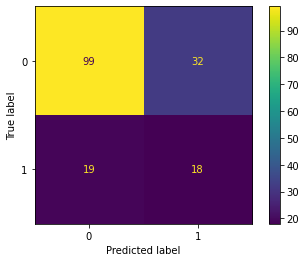

In [13]:
#confusion matrix of Train Data
plot_confusion_matrix(gnb, X_train, y_train)

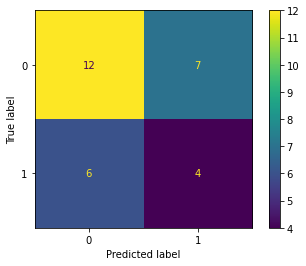

In [14]:
#confusion matrix of Test Data
plot_confusion_matrix(gnb, X_test, y_test)

Precision score for training data: 0.36
Recall score for training data: 0.4864864864864865
F1 score for training data: 0.4137931034482759
AUC for training data: 0.6211058386630905


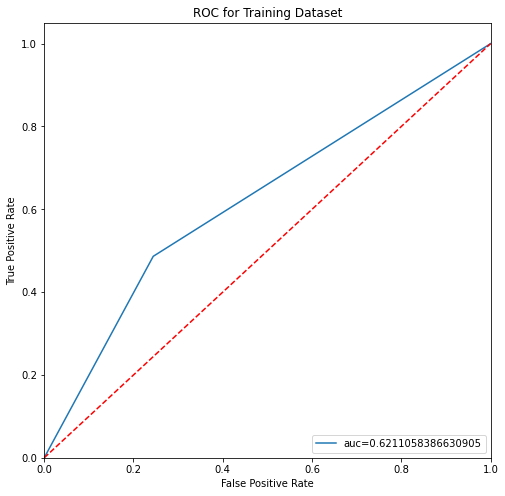

In [15]:
plt.rcParams["figure.figsize"] = (8,8)
fpr, tpr, _ = metrics.roc_curve(y_train,gnb.fit(X_train, y_train).predict(X_train))
auc = metrics.roc_auc_score(y_train, gnb.fit(X_train, y_train).predict(X_train))

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Dataset')
plt.legend(loc="lower right")

print("Precision score for training data:",precision_score(y_train,gnb.fit(X_train, y_train).predict(X_train)))
print("Recall score for training data:",recall_score(y_train,gnb.fit(X_train, y_train).predict(X_train)))
print("F1 score for training data:",f1_score(y_train,gnb.fit(X_train, y_train).predict(X_train)))
print("AUC for training data:",auc)

Precision score for Testing data: 0.36363636363636365
Recall score for Testing data: 0.4
F1 score for Testing data: 0.380952380952381
AUC for Testing data: 0.5157894736842105


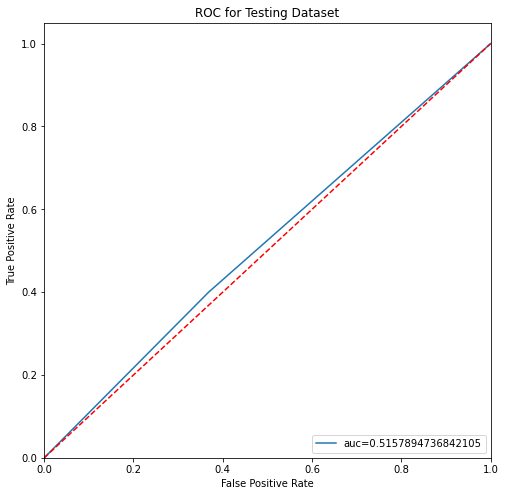

In [16]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

plt.rcParams["figure.figsize"] = (8,8)
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Dataset')
plt.legend(loc="lower right")

print("Precision score for Testing data:",precision_score(y_test,y_pred))
print("Recall score for Testing data:",recall_score(y_test,y_pred))
print("F1 score for Testing data:",f1_score(y_test,y_pred))
print("AUC for Testing data:",auc)

#### Upsampling and downsampling

Before sampling:


Text(0.5, 1.0, 'Before Sampling')

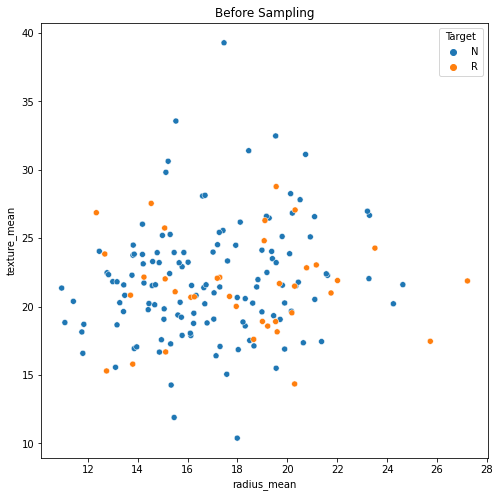

In [17]:
print("Before sampling:")
df_train["Target"].value_counts()

sns.scatterplot(data=df_train, x="radius_mean", y="texture_mean", hue="Target")
plt.title("Before Sampling")

In [18]:
count_class_N_0 = 90
count_class_R_1 = 90
pipe = make_pipeline(
    SMOTE(sampling_strategy={1: count_class_R_1},k_neighbors=5),
    NearMiss(sampling_strategy={0: count_class_N_0}
))

X_smt, y_smt = pipe.fit_resample(X_train, y_train)

In [19]:
print("After sampling:")
di = {0: 'N', 1:'R'}
y_temp = y_smt.map(di)
y_temp.value_counts()

After sampling:


N    90
R    90
Name: Target, dtype: int64

In [20]:
df_train_smt=  X_smt
df_train_smt["Target"]=y_smt

In [21]:
df_train_smt.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,area_mean_lg,smoothness_mean_lg,compactness_mean_lg,concavity_mean_lg,concave_points_mean_lg,symmetry_mean_lg,fractal_dimension_mean_lg,Diameter,Lymph_nodes,Target
0,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,1025.0,0.1551,0.4203,0.5203,0.2115,0.2834,0.08234,1.5,0.0,0
1,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,973.1,0.1301,0.3299,0.3630,0.1226,0.3175,0.09772,1.6,0.0,0
2,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946,1.3,0.0,0
3,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957,1.0,0.0,0
4,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,...,967.0,0.1246,0.2101,0.2866,0.1120,0.2282,0.06954,2.5,8.0,0


Text(0.5, 1.0, 'After Sampling')

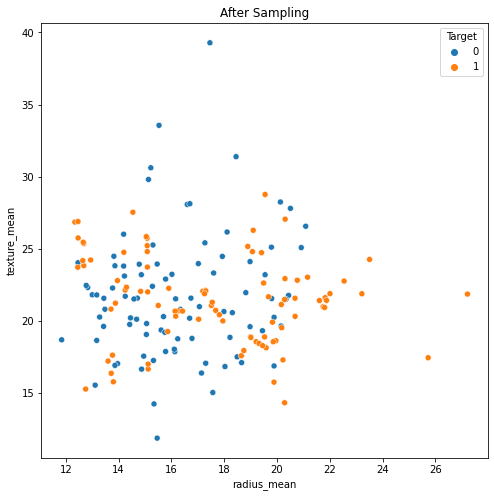

In [22]:
sns.scatterplot(data=df_train_smt, x="radius_mean", y="texture_mean", hue="Target")
plt.title("After Sampling")

In [23]:
X_smt=X_smt.drop(columns=['Target'])
gnb = GaussianNB()
gnb.fit(X_smt, y_smt)


GaussianNB()

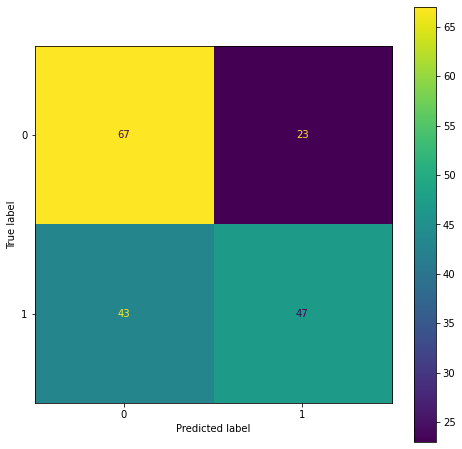

In [24]:
#confusion matrix of Train Data
plot_confusion_matrix(gnb, X_smt, y_smt)

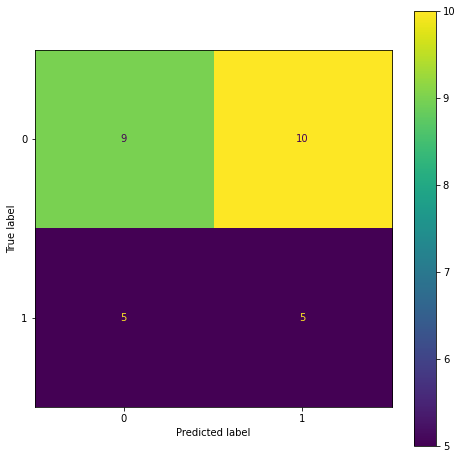

In [25]:
#confusion matrix of Test Data
plot_confusion_matrix(gnb, X_test, y_test)

Precision score for training data (SMOTE): 0.6714285714285714
Recall score for training data (SMOTE): 0.5222222222222223
F1 score for training data (SMOTE): 0.5875
AUC for training data (SMOTE): 0.6333333333333333


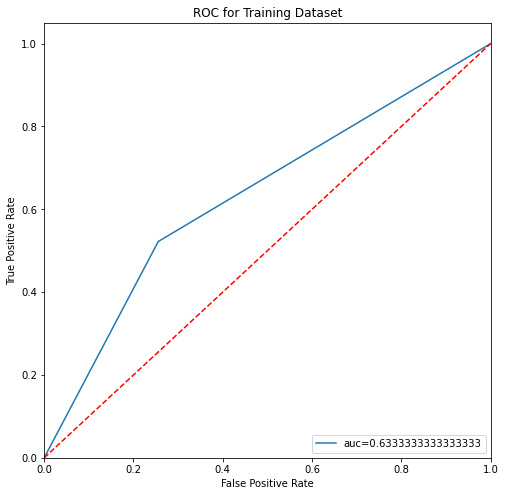

In [26]:
plt.rcParams["figure.figsize"] = (8,8)
fpr, tpr, _ = metrics.roc_curve(y_smt,gnb.fit(X_smt, y_smt).predict(X_smt))
auc = metrics.roc_auc_score(y_smt, gnb.fit(X_smt, y_smt).predict(X_smt))

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Dataset')
plt.legend(loc="lower right")

print("Precision score for training data (SMOTE):",precision_score(y_smt,gnb.fit(X_smt, y_smt).predict(X_smt)))
print("Recall score for training data (SMOTE):",recall_score(y_smt,gnb.fit(X_smt, y_smt).predict(X_smt)))
print("F1 score for training data (SMOTE):",f1_score(y_smt,gnb.fit(X_smt, y_smt).predict(X_smt)))
print("AUC for training data (SMOTE):",auc)

Precision score for Testing data (SMOTE): 0.3333333333333333
Recall score for Testing data (SMOTE): 0.5
F1 score for Testing data (SMOTE): 0.4
AUC for Testing data (SMOTE): 0.48684210526315785


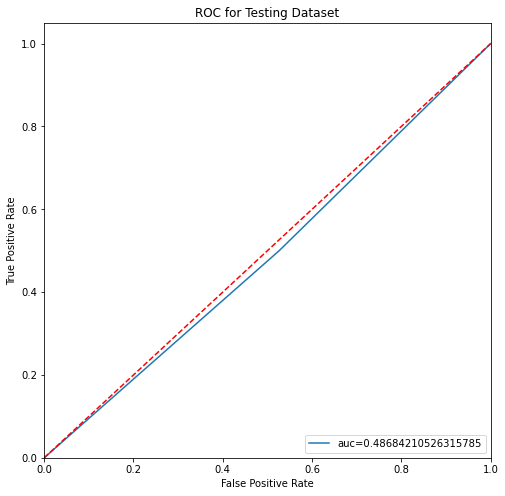

In [27]:
y_pred = gnb.fit(X_smt, y_smt).predict(X_test)

plt.rcParams["figure.figsize"] = (8,8)
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Dataset')
plt.legend(loc="lower right")

print("Precision score for Testing data (SMOTE):",precision_score(y_test,y_pred))
print("Recall score for Testing data (SMOTE):",recall_score(y_test,y_pred))
print("F1 score for Testing data (SMOTE):",f1_score(y_test,y_pred))
print("AUC for Testing data (SMOTE):",auc)

The SMOTE actually helps for upsampling the R class which in turn increases the train score efficiency and coming to the test
data the SMOTE did not add much value on this particular dataset.